In [1]:
import pandas as pd
import numpy as np       #importing necessary libraries
df = pd.read_csv('/co2-mm-mlo.csv')

In [2]:
arr_df = np.array(df)
print('dimesion of data',arr_df.shape) #creating array for faster calculation.

dimesion of data (706, 6)


In [3]:
x = arr_df[:,2]
y = arr_df[:,3]
xnew = np.linspace(1958.2877 ,2023.4583, num=783)
ynew = np.interp(xnew, x, y)                     # data has inconsistence gaps for which we require to interpolate it.


TypeError: ignored

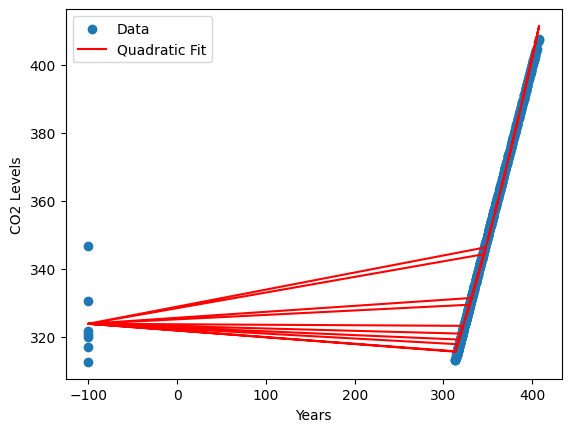

Quadratic Fit Coefficients:
a: 0.002036647026917035
b: -0.45410051590013395
c: 258.1128899801079
Derivative Coefficients:
2a: 0.00407329405383407
b: -0.45410051590013395


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have the years and co2_levels data
# Replace the following with your actual data
years =x
co2_levels = y

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic curve to the data
params, covariance = curve_fit(quadratic_function, years, co2_levels)

# Extract the fitted coefficients
a_fit, b_fit, c_fit = params

# Calculate the derivative of the quadratic function
# The derivative is a linear function: f'(x) = 2ax + b
derivative_coeffs = [2 * a_fit, b_fit]

# Plot the data and the fitted quadratic curve
plt.scatter(years, co2_levels, label='Data')
plt.plot(years, quadratic_function(years, *params), label='Quadratic Fit', color='red')
plt.xlabel('Years')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Print the coefficients of the quadratic fit
print('Quadratic Fit Coefficients:')
print('a:', a_fit)
print('b:', b_fit)
print('c:', c_fit)

# Print the coefficients of the linear derivative
print('Derivative Coefficients:')
print('2a:', derivative_coeffs[0])
print('b:', derivative_coeffs[1])
